In [34]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

In [35]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [36]:
def createdataframe(dir):
    images_path = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)  # Get the path to the label directory
        if os.path.isdir(label_path):  # Ensure it's a directory
            for imagename in os.listdir(label_path):  # Iterate over images in the label directory
                images_path.append(os.path.join(label_path, imagename))  # Append the full path of the image
                labels.append(label)  # Append the label
            print(label, "completed")  # Print the status

    return images_path, labels 

In [37]:
train = pd.DataFrame()
train["image"], train["label"] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [38]:
 print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [39]:
test = pd.DataFrame()
test["image"], test["label"] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [40]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [41]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [42]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\langa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [43]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [44]:
x_train = train_features/255.0
x_test = test_features/255.0

In [45]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [47]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [48]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [52]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 614ms/step - accuracy: 0.2373 - loss: 1.8400 - val_accuracy: 0.2564 - val_loss: 1.7951
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 126s 557ms/step - accuracy: 0.2549 - loss: 1.7964 - val_accuracy: 0.3048 - val_loss: 1.6860
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 127s 560ms/step - accuracy: 0.3131 - loss: 1.6924 - val_accuracy: 0.4026 - val_loss: 1.5486
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 124s 547ms/step - accuracy: 0.3804 - loss: 1.5698 - val_accuracy: 0.4622 - val_loss: 1.4017
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 123s 543ms/step - accuracy: 0.4280 - loss: 1.4710 - val_accuracy: 0.4894 - val_loss: 1.3380
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 122s 542ms/step - accuracy: 0.4548 - loss: 1.4197 - val_accuracy: 0.5136 - val_loss: 1.2969
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 123s 544ms/step - accuracy: 0.4719 - loss: 1.3752 - val_accuracy: 0.5181 - val_loss: 1.2734
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 123s 546ms/step - accuracy: 

KeyboardInterrupt: 

In [57]:
# Convert the model to JSON format
model_json = model.to_json()

# Save the model architecture to a JSON file
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the entire model (architecture + weights) to an HDF5 file
model.save("emotiondetector.h5")


In [59]:
from keras.models import model_from_json

In [61]:
# Load the model architecture from the JSON file
with open("emotiondetector.json", "r") as json_file:
    model_json = json_file.read()

# Reconstruct the model from the JSON string
model = model_from_json(model_json)

# Load the weights into the model
model.load_weights("emotiondetector.h5")

In [62]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [63]:
def ef(image_path):
    # Load the image in grayscale mode
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    
    # Convert the image to a NumPy array
    feature = np.array(img)
    
    # Reshape the array to fit the model input shape
    feature = feature.reshape(1, 48, 48, 1)
    
    # Normalize the pixel values to be between 0 and 1
    return feature / 255.0

In [71]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is  fear


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  fear


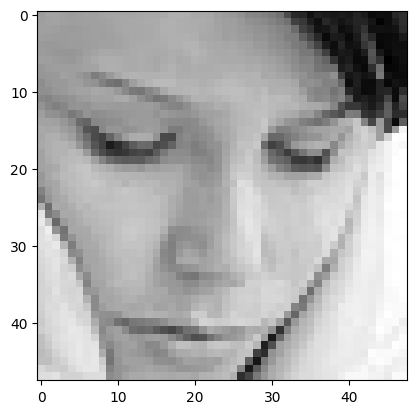

In [74]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  sad


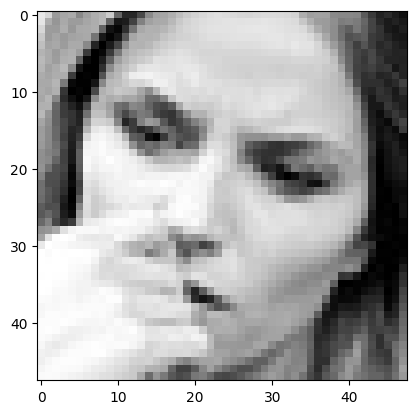

In [75]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')